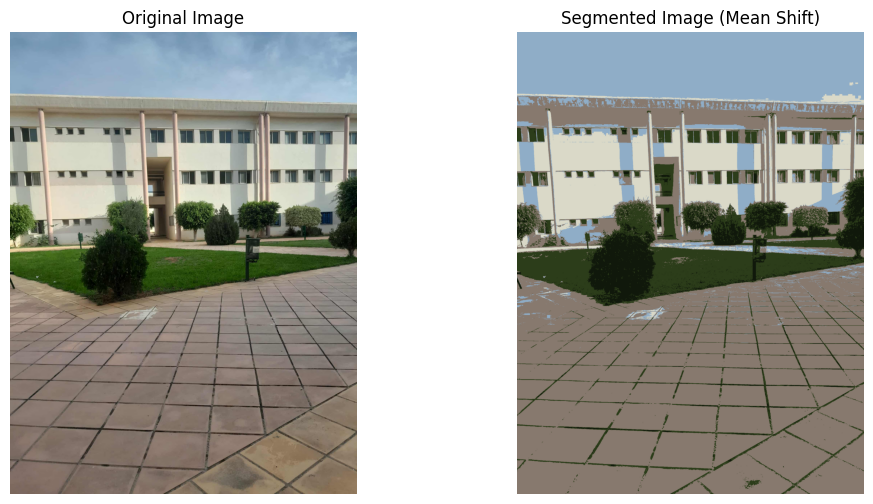

Estimated bandwidth: 0.576
Total clusters found: 5


In [1]:
# Mean Shift Image Segmentation based on color and intensity

import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler

# 1. Load and preprocess image

image = cv2.imread("111.jpeg")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

rows, cols, channels = image_rgb.shape


# 2. Reshape image for clustering

flat_image = np.reshape(image_rgb, [-1, 3])

# Normalize color values for stability
scaler = StandardScaler()
flat_image_scaled = scaler.fit_transform(flat_image)

# 3. Estimate bandwidth & fit Mean Shift

bandwidth = estimate_bandwidth(flat_image_scaled, quantile=0.1, n_samples=500)

# Apply Mean Shift clustering
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(flat_image_scaled)

labels = ms.labels_

cluster_centers = scaler.inverse_transform(ms.cluster_centers_)

# 4. Recreate segmented image

segmented_image = cluster_centers[labels].reshape(rows, cols, 3).astype(np.uint8)

# 5. Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Segmented Image (Mean Shift)")
plt.axis("off")

plt.show()

print(f"Estimated bandwidth: {bandwidth:.3f}")
print(f"Total clusters found: {len(np.unique(labels))}")


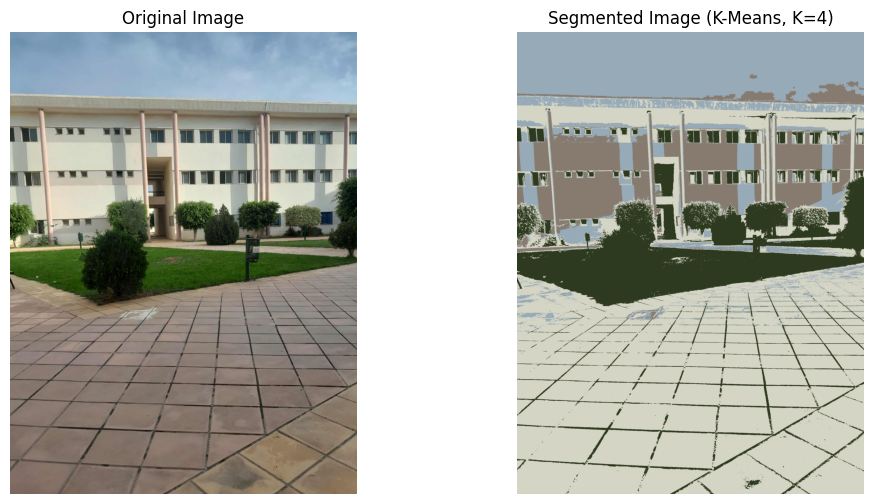

In [3]:
# Image segmentation using K-Means clustering
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Load and preprocess image

image = cv2.imread("111.jpeg")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

rows, cols, channels = image_rgb.shape

# 2. Prepare data for clustering
pixel_values = image_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)  # Convert to float for KMeans

# 3. Apply K-Means Clustering

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

K = 4 
kmeans = cv2.kmeans(pixel_values, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)[2]


# 4. Reconstruct segmented image

centers = np.uint8(kmeans)
labels = cv2.kmeans(pixel_values, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)[1].flatten()

segmented_image = centers[labels]
segmented_image = segmented_image.reshape(image_rgb.shape)

# 5. Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f"Segmented Image (K-Means, K={K})")
plt.axis("off")

plt.show()


MeanShift provides better clarity at the cost of higher computation time